In [ ]:
!pip install catboost
!pip install pandas-summary
!pip install optuna
!pip install pycaret
!pip install --upgrade numpy scikit-learn pycaret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.5 MB/s eta 0:00:00
 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence
#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm
from pycaret.classification import *

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('Metabolic Syndrome.csv')
data

seqn  Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
0     62161   22    Male   Single  8200.0        White       81.0  23.3   
1     62164   44  Female  Married  4500.0        White       80.1  23.2   
2     62169   21    Male   Single   800.0        Asian       69.6  20.1   
3     62172   43  Female   Single  2000.0        Black      120.4  33.3   
4     62177   51    Male  Married     NaN        Asian       81.1  20.1   
...     ...  ...     ...      ...     ...          ...        ...   ...   
2396  71901   48  Female  Married  1000.0        Other        NaN  59.7   
2397  71904   30  Female   Single  2000.0        Asian        NaN  18.0   
2398  71909   28    Male   Single   800.0  MexAmerican      100.8  29.4   
2399  71911   27    Male  Married  8200.0  MexAmerican      106.6  31.3   
2400  71915   60    Male   Single  6200.0        White      106.6  27.5   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0               0     3.88       4.9            92   41             84   
1               0     8.55       4.5            82   28             56   
2               0     5.07       5.4           107   43             78   
3               0     5.22       5.0           104   73            141   
4               0     8.13       5.0            95   43            126   
...           ...      ...       ...           ...  ...            ...   
2396            0    22.11       5.8           152   57            107   
2397            0     2.90       7.9            91   90             91   
2398            0     2.78       6.2            99   47             84   
2399            0     4.15       6.2           100   41            124   
2400            0    12.82       5.2            91   36            226   

      MetabolicSyndrome  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
2396                  0  
2397                  0  
2398                  0  
2399                  1  
2400                  1  

[2401 rows x 15 columns]

In [ ]:

data.shape

(2401, 15)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [ ]:
data.describe()

seqn          Age       Income    WaistCirc          BMI  \
count   2401.000000  2401.000000  2284.000000  2316.000000  2375.000000   
mean   67030.674302    48.691795  4005.253940    98.307254    28.702189   
std     2823.565114    17.632852  2954.032186    16.252634     6.662242   
min    62161.000000    20.000000   300.000000    56.200000    13.400000   
25%    64591.000000    34.000000  1600.000000    86.675000    24.000000   
50%    67059.000000    48.000000  2500.000000    97.000000    27.700000   
75%    69495.000000    63.000000  6200.000000   107.625000    32.100000   
max    71915.000000    80.000000  9000.000000   176.000000    68.700000   

       Albuminuria      UrAlbCr     UricAcid  BloodGlucose          HDL  \
count  2401.000000  2401.000000  2401.000000   2401.000000  2401.000000   
mean      0.154102    43.626131     5.489046    108.247813    53.369429   
std       0.422780   258.272829     1.439358     34.820657    15.185537   
min       0.000000     1.400000     1.800000     39.000000    14.000000   
25%       0.000000     4.450000     4.500000     92.000000    43.000000   
50%       0.000000     7.070000     5.400000     99.000000    51.000000   
75%       0.000000    13.690000     6.400000    110.000000    62.000000   
max       2.000000  5928.000000    11.300000    382.000000   156.000000   

       Triglycerides  MetabolicSyndrome  
count    2401.000000        2401.000000  
mean      128.125364           0.342357  
std        95.322477           0.474597  
min        26.000000           0.000000  
25%        75.000000           0.000000  
50%       103.000000           0.000000  
75%       150.000000           1.000000  
max      1562.000000           1.000000

In [ ]:

data.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [ ]:
### DATA PREPROCESSING ###

In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].mean())
data['WaistCirc'] = data['WaistCirc'].fillna(data['WaistCirc'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [ ]:
data.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income                 0
Race                   0
WaistCirc              0
BMI                    0
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [ ]:
print(data['Race'].value_counts())
print(data['Sex'].value_counts())
print(data['Marital'].value_counts())

Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64
Sex
Female    1211
Male      1190
Name: count, dtype: int64
Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64


In [ ]:
## For filling the missing values ###
# Label Encoding
# Race Column
race_mapping = {'White': 0, 'Black': 1, 'Asian': 2, 'Hispanic': 3, 'MexAmerican': 4, 'Other': 5}
data['Race'] = data['Race'].map(race_mapping)

# Sex Column
sex_mapping = {'Male': 1, 'Female': 0}
data['Sex'] = data['Sex'].map(sex_mapping)

# Marital Column
marital_mapping = {'Married': 1, 'Single': 0, 'Divorced': 3, 'Widowed': 4, 'Separated': 5}
data['Marital'] = data['Marital'].map(marital_mapping)

data['Marital'] = data['Marital'].fillna(data['Marital'].mean())

data.isnull().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [ ]:

data.head()

seqn  Age  Sex  Marital      Income  Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    1      0.0  8200.00000     0       81.0  23.3            0   
1  62164   44    0      1.0  4500.00000     0       80.1  23.2            0   
2  62169   21    1      0.0   800.00000     2       69.6  20.1            0   
3  62172   43    0      0.0  2000.00000     1      120.4  33.3            0   
4  62177   51    1      1.0  4005.25394     2       81.1  20.1            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  MetabolicSyndrome  
0     3.88       4.9            92   41             84                  0  
1     8.55       4.5            82   28             56                  0  
2     5.07       5.4           107   43             78                  0  
3     5.22       5.0           104   73            141                  0  
4     8.13       5.0            95   43            126                  0

In [ ]:

print(data['MetabolicSyndrome'].value_counts())

MetabolicSyndrome
0    1579
1     822
Name: count, dtype: int64


In [ ]:
# Define features (X) and target (y)
X = data.drop('MetabolicSyndrome', axis=1)
y = data['MetabolicSyndrome']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features and the original target variable
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data['MetabolicSyndrome'] = y

# Display the scaled dataset
scaled_data.head()

seqn       Age       Sex   Marital        Income      Race  WaistCirc  \
0 -1.725014 -1.514069  1.008785 -1.061631  1.456242e+00 -0.943516  -1.084489   
1 -1.723951 -0.266138 -0.991292 -0.300049  1.717553e-01 -0.943516  -1.140883   
2 -1.722180 -1.570793  1.008785 -1.061631 -1.112731e+00  0.415441  -1.798823   
3 -1.721117 -0.322862 -0.991292 -1.061631 -6.961411e-01 -0.264037   1.384352   
4 -1.719346  0.130931  1.008785 -0.300049  1.578694e-16  0.415441  -1.078222   

        BMI  Albuminuria   UrAlbCr  UricAcid  BloodGlucose       HDL  \
0 -0.815465    -0.364574 -0.153924 -0.409328     -0.466711 -0.814723   
1 -0.830560    -0.364574 -0.135839 -0.687287     -0.753957 -1.670979   
2 -1.298507    -0.364574 -0.149316 -0.061878     -0.035843 -0.682991   
3  0.694043    -0.364574 -0.148735 -0.339838     -0.122017  1.292984   
4 -1.298507    -0.364574 -0.137465 -0.339838     -0.380538 -0.682991   

   Triglycerides  MetabolicSyndrome  
0      -0.463003                  0  
1      -0.756804                  0  
2      -0.525960                  0  
3       0.135092                  0  
4      -0.022301                  0

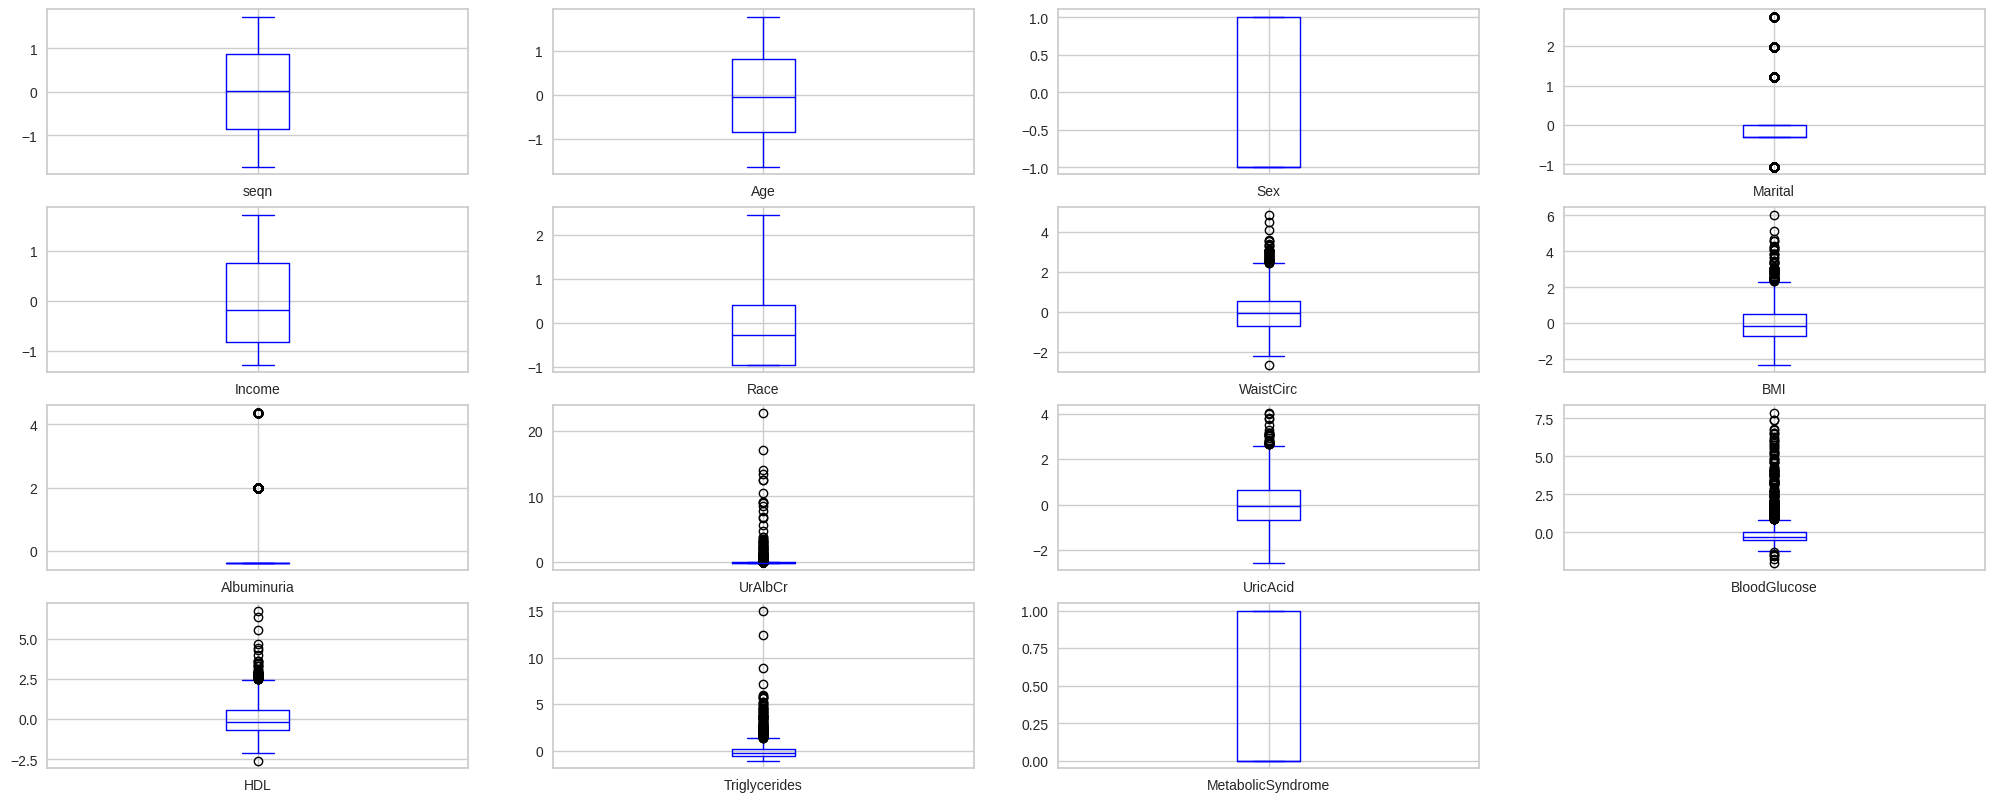

In [ ]:
scaled_data.plot(color = 'blue', kind='box', figsize=(25, 15), subplots=True, layout=(6,4))
plt.show()

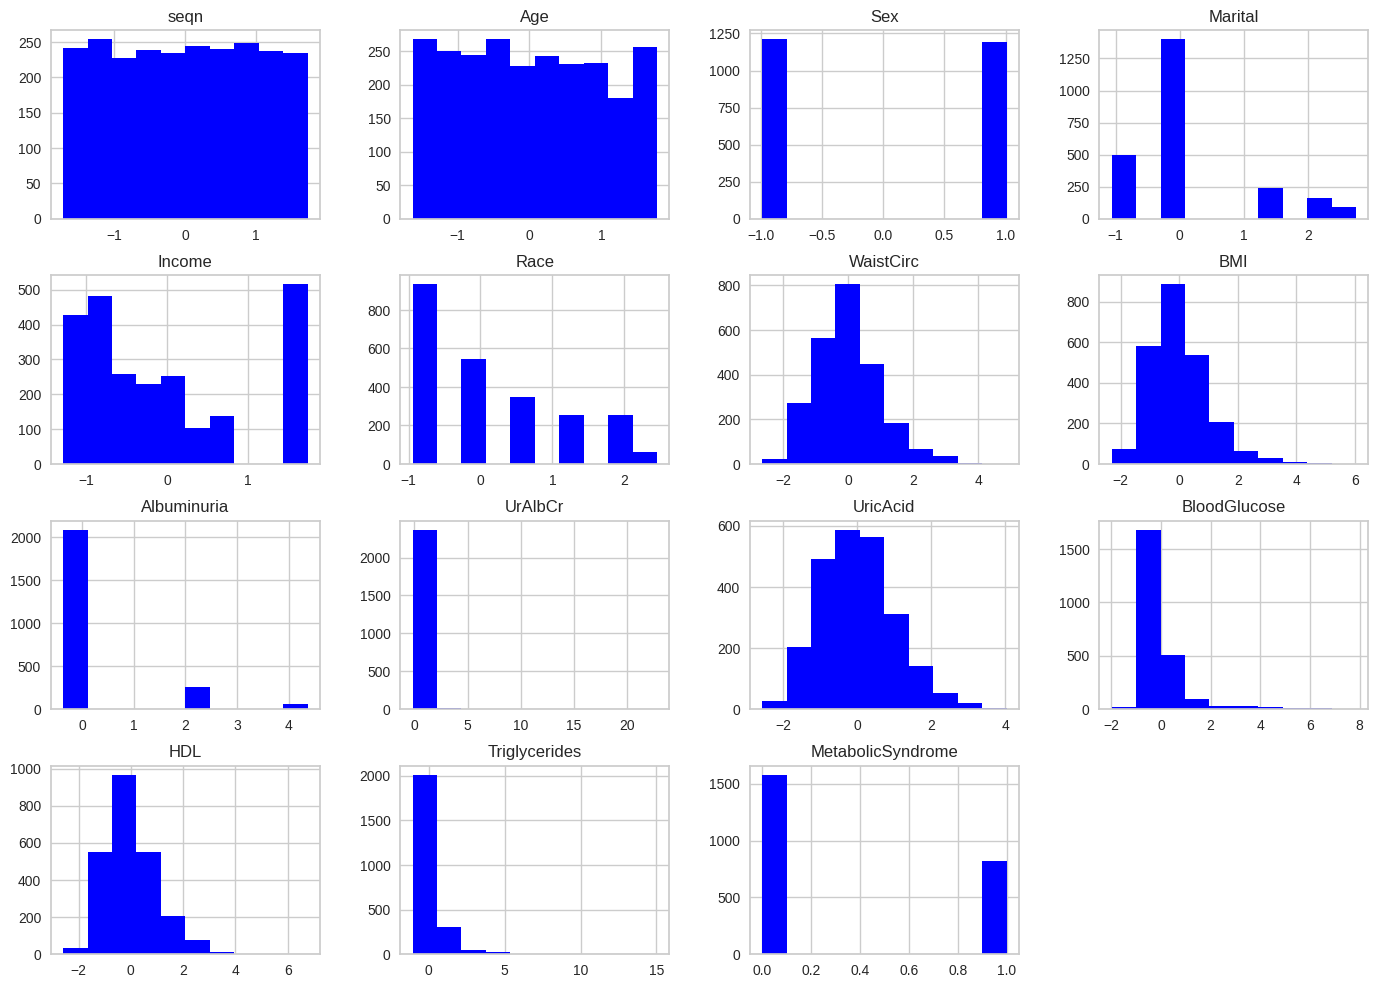

In [ ]:
#histogram
scaled_data.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

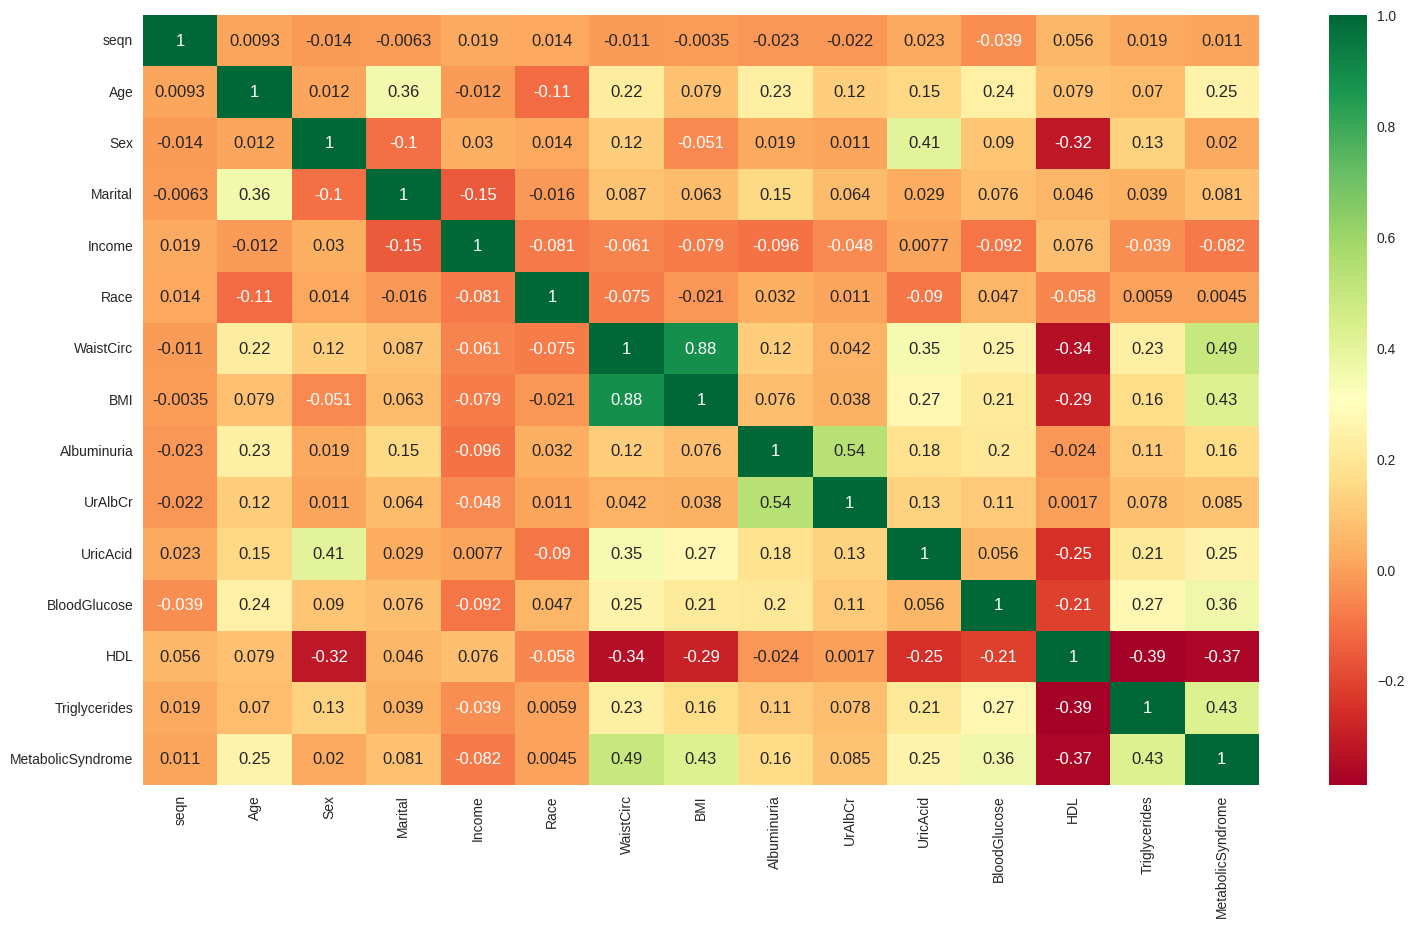

In [ ]:

#get correlations of each features in dataset
corrmat = scaled_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()


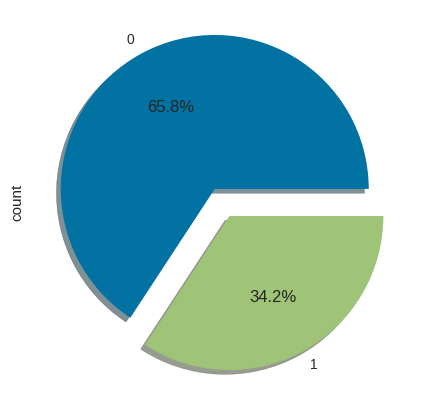

In [ ]:

plt.figure(figsize=(15, 5))
scaled_data['MetabolicSyndrome'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical features
categorical_features = ['Race', 'Sex', 'Marital']

# Perform tests for each feature
for feature in categorical_features:
    # Chi-squared test
    contingency_table = pd.crosstab(scaled_data[feature], scaled_data['MetabolicSyndrome'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature} vs. MetabolicSyndrome:")
    print(f"  Chi2 Statistic: {chi2_stat:.3f}")
    print(f"  P-value: {p_value:.3f}")

    # Cramer's V (if association is significant)
    if p_value < 0.05:  # Adjust significance level as needed
        v = cramers_v(scaled_data[feature], scaled_data['MetabolicSyndrome'])
        print(f"  Cramer's V: {v:.3f}")
    print("-" * 30)  # Separator for clarity

Chi-squared test for Race vs. MetabolicSyndrome:
  Chi2 Statistic: 30.379
  P-value: 0.000
  Cramer's V: 0.103
------------------------------
Chi-squared test for Sex vs. MetabolicSyndrome:
  Chi2 Statistic: 0.911
  P-value: 0.340
------------------------------
Chi-squared test for Marital vs. MetabolicSyndrome:
  Chi2 Statistic: 33.775
  P-value: 0.000
  Cramer's V: 0.109
------------------------------


In [ ]:
###############
Interpretation of the test:

Race: Test Results: Chi-squared Statistic: 30.379, P-value: 0.000, Cramer's V: 0.103 Interpretation: There is a statistically significant but weak association between race and Metabolic Syndrome

Sex: Test Results: Chi-squared Statistic: 0.911, P-value: 0.340 Interpretation: There is no statistically significant association between sex and Metabolic Syndrome.

Marital Status: Test Results: Chi-squared Statistic: 33.775, P-value: 0.000, Cramer's V: 0.109 Interpretation: There is a statistically significant but weak association between marital status and Metabolic Syndrome. While marital status is likely related to the syndrome, the practical impact might be limited.

In [ ]:
# IQR method for outlier detection and removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Usage for each column (excluding the target variable):
for col in scaled_data.columns[:-1]:  # Iterate through all columns except the last one
    scaled_data = remove_outliers_iqr(scaled_data, col)

# Display the data after removing outliers
print(scaled_data.shape)
scaled_data.head()

(932, 15)


seqn       Age       Sex   Marital        Income      Race  WaistCirc  \
1  -1.723951 -0.266138 -0.991292 -0.300049  1.717553e-01 -0.943516  -1.140883   
4  -1.719346  0.130931  1.008785 -0.300049  1.578694e-16  0.415441  -1.078222   
7  -1.715095 -1.060276 -0.991292 -0.300049  7.619249e-01  0.415441  -1.134617   
9  -1.712970 -0.776655  1.008785  0.000000 -5.225618e-01 -0.264037   0.043408   
10 -1.711553  0.471276  1.008785  0.000000  1.733969e+00 -0.943516   0.594824   

         BMI  Albuminuria   UrAlbCr  UricAcid  BloodGlucose       HDL  \
1  -0.830560    -0.364574 -0.135839 -0.687287     -0.753957 -1.670979   
4  -1.298507    -0.364574 -0.137465 -0.339838     -0.380538 -0.682991   
7  -0.951320    -0.364574 -0.134948  0.841491     -0.725233 -0.353662   
9  -0.075806    -0.364574 -0.160391  0.841491     -0.409262 -0.485394   
10 -0.105996    -0.364574 -0.152840  0.355061     -0.236915 -1.209918   

    Triglycerides  MetabolicSyndrome  
1       -0.756804                  0  
4       -0.022301                  0  
7       -0.389552                  0  
9       -0.442017                  0  
10      -0.316102                  1

In [ ]:
new_data = scaled_data.drop('seqn', axis=1)

In [ ]:

from pycaret.classification import *
clf_setup = setup(data=new_data,
                  target='MetabolicSyndrome',
                  session_id=42,
                  preprocess=True,
                  normalize=True,
                  transformation=True,
                  index=False,
                  verbose=True)


In [ ]:

print('comparing models for metabolic syndrome data and selecting top 5 out of them based on accuracy score')
top_model = compare_models(n_select = 5, sort='Accuracy')

comparing models for metabolic syndrome data and selecting top 5 out of them based on accuracy score


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [ ]:

print("Top 5 Models are:")
for model in top_model:
  print(type(model).__name__)

Top 5 Models are:
GradientBoostingClassifier
CatBoostClassifier
LGBMClassifier
LinearDiscriminantAnalysis
XGBClassifier


In [ ]:

# Create a stacked ensemble model
stacker = stack_models(estimator_list=top_model, meta_model=XGBClassifier(), fold=10, method='auto')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Evaluate the stacker model
print(stacker)
evaluate_model(stacker)

StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                     

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
import shap


# Defining the Dependedent and the Independent Variable
X = new_data.drop('MetabolicSyndrome', axis=1)
y = new_data['MetabolicSyndrome']

In [ ]:
explainer = shap.Explainer(lambda x: stacker.predict_proba(x)[:,1], X)

In [ ]:
shap_values = explainer(X)

PermutationExplainer explainer: 933it [19:29,  1.26s/it]


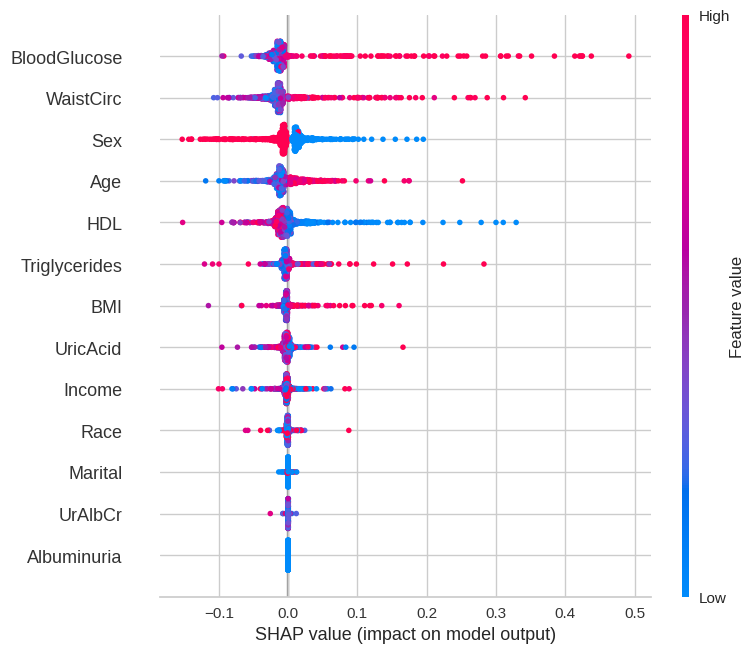

In [ ]:
shap.summary_plot(shap_values, X)

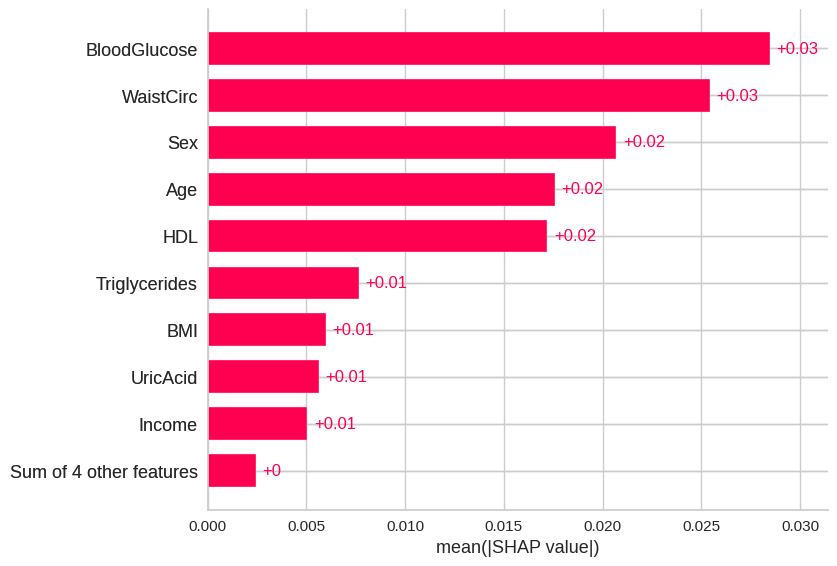

In [ ]:
shap.plots.bar(shap_values)

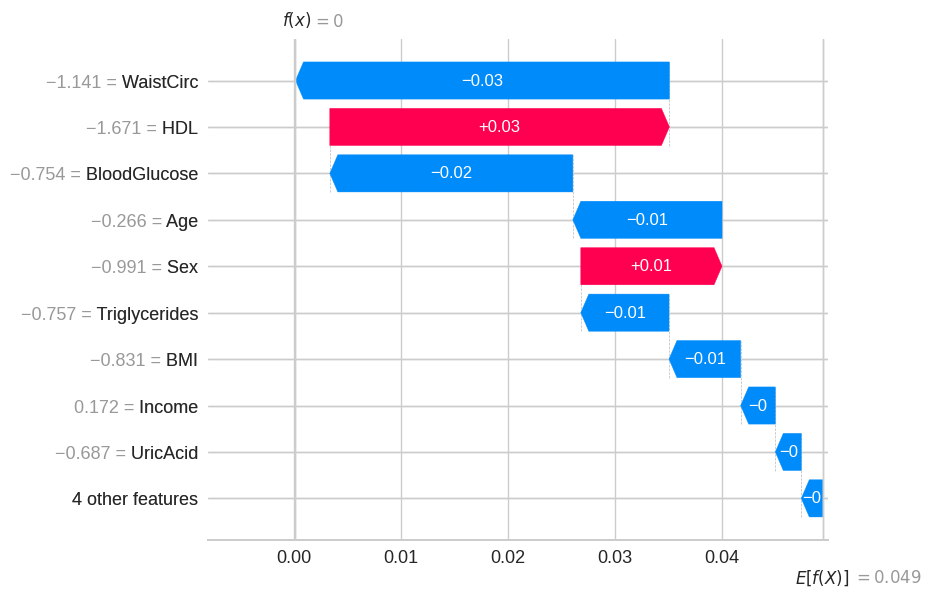

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
###LIME Local Interpretable Model-agnostic Explanations

In [ ]:
!pip install lime

import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d986a56d1d76d34ca6a0fdded921f2a51f1e2c76a0955185c76085478c26d062
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,  # Use the NumPy array representation of X
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['No Metabolic Syndrome', 'Metabolic Syndrome'], # Class names
    mode='classification' # or 'regression' depending on the task
)


# Choose an instance to explain
instance_index = 5 # Example: explain the first instance
instance = X.iloc[instance_index]


# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: stacker.predict_proba(pd.DataFrame(x, columns=X.columns)), # Use a lambda function to wrap the prediction
    num_features=6  # Number of features to show in explanation
)


# Show the explanation
explanation.show_in_notebook(show_table=True)

explanation.as_list()

[('WaistCirc <= -0.75', -0.02088751150027844),
 ('BloodGlucose <= -0.50', -0.01566298536127086),
 ('-0.99 < Sex <= 1.01', -0.01125411732019),
 ('-0.62 < HDL <= -0.09', -0.007273329997576925),
 ('-0.70 < Income <= 0.17', -0.005310367180516115),
 ('BMI <= -0.76', -0.003914140031527964)]

In [ ]:
# Choose another instance to explain
instance_index_2 = 15 # explain the 15th instance
instance_2 = X.iloc[instance_index_2]

# Explain the second instance
explanation_2 = explainer.explain_instance(
    instance_2.values,
    lambda x: stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=10  # Number of features to show in explanation
)

# Show the second explanation
explanation_2.show_in_notebook(show_table=True)
explanation_2.as_list()

[('Age > 0.70', 0.022594022954536195),
 ('-0.75 < WaistCirc <= -0.16', -0.014117723666142218),
 ('-0.09 < HDL <= 0.57', -0.013057147103317776),
 ('Sex <= -0.99', 0.010867625118809301),
 ('-0.50 < BloodGlucose <= -0.29', -0.010492719722832802),
 ('Marital <= -0.30', 0.006301671666235849),
 ('Triglycerides > 0.07', 0.0024432508622030022),
 ('UricAcid > 0.49', -0.0020680976423674193),
 ('-0.70 < Income <= 0.17', 0.0010044523778838625),
 ('Race <= -0.94', -0.0009760842408106858)]

In [ ]:
# Choose yet another instance to explain
instance_index_3 = 100 # Explain the 100th instance
instance_3 = X.iloc[instance_index_3]

# Explain the third instance
explanation_3 = explainer.explain_instance(
    instance_3.values,
    lambda x: stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=8  # Number of features to show in explanation
)

# Show the third explanation
explanation_3.show_in_notebook(show_table=True)
explanation_3.as_list()

[('WaistCirc > 0.34', 0.05327935737756815),
 ('-0.50 < BloodGlucose <= -0.29', -0.016972715403312966),
 ('Age <= -0.78', -0.014669700815004625),
 ('HDL > 0.57', -0.013903273196446476),
 ('Sex <= -0.99', 0.013026233993082765),
 ('UricAcid <= -0.76', 0.007796387131284023),
 ('0.17 < Income <= 1.46', -0.005445645400340707),
 ('Marital <= -0.30', -0.004337379903045162)]